## MNIST download from torchvision

In [1]:
import torch
import torchvision.datasets as dsets
import torchvision.transforms as transforms

from torch.utils.data import DataLoader
import torch.nn as nn
import matplotlib.pyplot as plt
import random

In [2]:
device = torch.device('mps')
print(f'Train using: {device}')

Train using: mps


In [3]:
epochs = 100
batch_size = 100

In [4]:
mnist_train = dsets.MNIST(root='MNIST_data/',
                          train=True,
                          transform=transforms.ToTensor(),
                          download=True)

mnist_test = dsets.MNIST(root='MNIST_data/',
                         train=False,
                         transform=transforms.ToTensor(),
                         download=True)

In [5]:
loader = DataLoader(dataset=mnist_train, batch_size=batch_size, shuffle=True, drop_last=True)

"""
Why drop_last = True? 
-> drop_last를 하는 이유를 이해하기 위해서 1,000개의 데이터가 있다고 했을 때, 배치 크기가 128이라고 해봅시다. 
1,000을 128로 나누면 총 7개가 나오고 나머지로 104개가 남습니다. 
이때 104개를 마지막 배치로 한다고 하였을 때 128개를 충족하지 못하였으므로 104개를 그냥 버릴 수도 있습니다. 
이때 마지막 배치를 버리려면 drop_last=True를 해주면 됩니다. 
이는 다른 미니 배치보다 개수가 적은 마지막 배치를 경사 하강법에 사용하여 마지막 배치가 상대적으로 과대 평가되는 현상을 막아줍니다.
"""

'\nWhy drop_last = True? \n-> drop_last를 하는 이유를 이해하기 위해서 1,000개의 데이터가 있다고 했을 때, 배치 크기가 128이라고 해봅시다. \n1,000을 128로 나누면 총 7개가 나오고 나머지로 104개가 남습니다. \n이때 104개를 마지막 배치로 한다고 하였을 때 128개를 충족하지 못하였으므로 104개를 그냥 버릴 수도 있습니다. \n이때 마지막 배치를 버리려면 drop_last=True를 해주면 됩니다. \n이는 다른 미니 배치보다 개수가 적은 마지막 배치를 경사 하강법에 사용하여 마지막 배치가 상대적으로 과대 평가되는 현상을 막아줍니다.\n'

## Model

In [6]:
linear = nn.Linear(784, 10, bias=True).to(device)
criterion = nn.CrossEntropyLoss().to(device)
optimizer = torch.optim.SGD(linear.parameters(), lr=0.1)

In [7]:
for epoch in range(1 + epochs):
    avg_loss = 0.0
    total_batch = len(loader)

    for X, y in loader:
        # X.size = (100, 784)
        # Y.size = (100, 784)
        X = X.view(-1, 28 * 28).to(device)
        y = y.to(device)

        optimizer.zero_grad()
        forward = linear(X)
        loss = criterion(forward, y)
        loss.backward()
        optimizer.step()

        avg_loss += loss / total_batch

    print(f'Epochs: {epoch:4d}/{epochs:4d}, loss: {loss:.6f} ')

print(f'Learning finished')


Epochs:    0/ 100, loss: 0.635305 
Epochs:    1/ 100, loss: 0.228254 
Epochs:    2/ 100, loss: 0.424329 
Epochs:    3/ 100, loss: 0.176563 
Epochs:    4/ 100, loss: 0.364699 
Epochs:    5/ 100, loss: 0.350599 
Epochs:    6/ 100, loss: 0.324628 
Epochs:    7/ 100, loss: 0.206336 
Epochs:    8/ 100, loss: 0.296542 
Epochs:    9/ 100, loss: 0.223997 
Epochs:   10/ 100, loss: 0.234409 
Epochs:   11/ 100, loss: 0.419023 
Epochs:   12/ 100, loss: 0.252132 
Epochs:   13/ 100, loss: 0.167446 
Epochs:   14/ 100, loss: 0.199012 
Epochs:   15/ 100, loss: 0.231792 
Epochs:   16/ 100, loss: 0.219995 
Epochs:   17/ 100, loss: 0.266404 
Epochs:   18/ 100, loss: 0.291756 
Epochs:   19/ 100, loss: 0.158132 
Epochs:   20/ 100, loss: 0.275450 
Epochs:   21/ 100, loss: 0.211971 
Epochs:   22/ 100, loss: 0.249947 
Epochs:   23/ 100, loss: 0.231550 
Epochs:   24/ 100, loss: 0.318432 
Epochs:   25/ 100, loss: 0.189249 
Epochs:   26/ 100, loss: 0.347133 
Epochs:   27/ 100, loss: 0.275720 
Epochs:   28/ 100, l

Accuracy:  tensor(0.8676, device='mps:0')
Label:  0
Prediction:  7


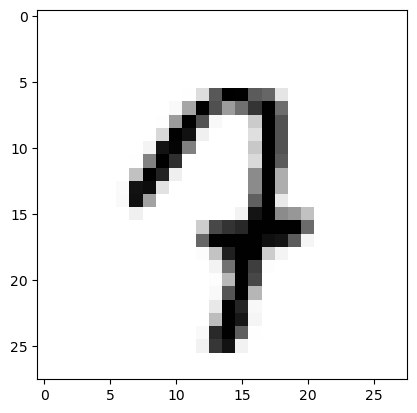

In [8]:
import warnings
warnings.filterwarnings("ignore")

with torch.no_grad():
    x_test = mnist_test.test_data.view(-1, 784).float().to(device)
    y_test = mnist_test.test_labels.to(device)

    pred = linear(x_test)
    corr = torch.argmax(pred, 1) == y_test
    acc = corr.float().mean()
    print('Accuracy: ', acc)

    r = random.randint(0, len(mnist_test) - 1)
    X_single_data = mnist_test.test_data[r:r + 1].view(-1, 28 * 28).float().to(device)
    Y_single_data = mnist_test.test_labels[r:r + 1].to(device)

    print('Label: ', Y_single_data.item())
    single_prediction = linear(X_single_data)
    print('Prediction: ', torch.argmax(single_prediction, 1).item())

    plt.imshow(mnist_test.test_data[r:r + 1].view(28, 28), cmap='Greys', interpolation='nearest')
    plt.show()